In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

import shap

# load JS visualization code to notebook. Without this, the SHAP plots won't be displayed
shap.initjs()

In [2]:
#getting the data and labels from the dataset
data, labels = shap.datasets.adult(display=True)

#storing the labels as an numpy array
labels = np.array([int(label) for label in labels])

print(data.shape, labels.shape)
data.head()

(32561, 12) (32561,)


,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


In [3]:
#seeing the distribution of class labels
pd.Series(labels).value_counts()

0    24720
1     7841
dtype: int64

In [7]:
#Here we convert the categorical columns with string values to numeric representations.
cat_cols = data.select_dtypes(['category']).columns # Storing names of all categorical columns in cat_cols
cat_cols

Index(['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Country'],
      dtype='object')

In [4]:
data['Workclass']

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: Workclass, Length: 32561, dtype: category
Categories (9, object): [?, Federal-gov, Local-gov, Never-worked, ..., Self-emp-inc, Self-emp-not-inc, State-gov, Without-pay]

In [5]:
data['Workclass'].cat

In [6]:
data['Workclass'].cat.codes

0        7
1        6
2        4
3        4
4        4
        ..
32556    4
32557    4
32558    4
32559    4
32560    5
Length: 32561, dtype: int8

In [8]:
data[cat_cols] = data[cat_cols].apply(lambda x: x.cat.codes) # Converting the categorical columns into numerical columns
data.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,1,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,0,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,1,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,0,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5


In [9]:
#processed dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
X_train.head()

(22792, 12) (9769, 12)


,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
19749,34.0,6,9.0,2,5,5,4,0,0.0,2179.0,12.0,39
1216,48.0,6,10.0,2,3,0,0,1,7688.0,0.0,40.0,39
27962,23.0,7,10.0,2,10,0,4,1,0.0,0.0,30.0,39
23077,56.0,2,9.0,0,4,1,4,0,0.0,0.0,40.0,39
10180,17.0,4,7.0,4,9,3,4,0,0.0,0.0,9.0,39


In [10]:
#raw dataset
data_disp, labels_disp = shap.datasets.adult(display=True)
X_train_disp, X_test_disp, y_train_disp, y_test_disp = train_test_split(data_disp, labels_disp, test_size=0.3, random_state=42)
print(X_train_disp.shape, X_test_disp.shape)
X_train_disp.head(3)

(22792, 12) (9769, 12)


,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
19749,34.0,Self-emp-not-inc,9.0,Married-civ-spouse,Farming-fishing,Wife,White,Female,0.0,2179.0,12.0,United-States
1216,48.0,Self-emp-not-inc,10.0,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688.0,0.0,40.0,United-States
27962,23.0,State-gov,10.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,30.0,United-States


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
gbt = GradientBoostingClassifier(n_estimators=500, max_depth=5, random_state=42)

In [13]:
gbt.fit(X_train, y_train) # [0.1,0.01,0.05,0.001]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
predictions = gbt.predict(X_test)
predictions[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [15]:
accuracy_score(y_test, predictions)

0.8687685535878801

## SHAP

The really awesome aspect about this framework is while SHAP values can explain the output of any machine learning model, for really complex ensemble models it can be slow. But they have developed a high-speed exact algorithm for tree ensemble methods. Fast C++ implementations are supported for XGBoost, LightGBM, CatBoost, and scikit-learn tree models!

SHAP (SHapley Additive exPlanations) assigns each feature an importance value for a particular prediction.

Its novel components include:

the identification of a new class of additive feature importance measures
theoretical results showing there is a unique solution in this class with a set of desirable properties.
Typically, SHAP values try to explain the output of a model (function) as a sum of the effects of each feature being introduced into a conditional expectation. Importantly, for non-linear functions the order in which features are introduced matters. The SHAP values result from averaging over all possible orderings. Proofs from game theory show this is the only possible consistent approach.

In [16]:
# creating an explainer for our model
explainer = shap.TreeExplainer(gbt)

#LinearExplainer - KNN, Logitic Reg, Linear Reg
#DeepExplaineer - Deep Learning Models

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_test)
shap_values

array([[-0.71209427, -0.01302573,  0.04146079, ..., -0.01798849,
        -0.32059335,  0.01046549],
       [ 0.77578348, -0.26611818, -0.39195549, ..., -0.04764566,
         0.01053597,  0.02993349],
       [-0.33794513,  0.02463016,  1.13308099, ..., -0.07035144,
         0.64738696,  0.02771113],
       ...,
       [-1.57175344,  0.04869449, -0.40665746, ..., -0.01994416,
         0.01877592,  0.02578256],
       [ 0.78894857,  0.04148134,  0.03080296, ..., -0.05485771,
         0.13596136,  0.01551252],
       [ 0.65524197,  0.0541348 ,  0.53852184, ..., -0.02977515,
         0.10273684,  0.034729  ]])

In [18]:
# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: -2.6377680191339934


In [19]:
1/(1+np.exp(2.6377680191339934))

0.06674693526498893

In [20]:
# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.712094,-0.013026,0.041461,-0.263703,-0.296668,-0.677146,0.044017,-0.319844,-0.208128,-0.017988,-0.320593,0.010465
1,0.775783,-0.266118,-0.391955,0.803196,0.386975,1.772513,0.036464,-0.192418,-0.181687,-0.047646,0.010536,0.029933
2,-0.337945,0.024630,1.133081,0.479581,0.670906,1.059735,-0.122295,0.103980,-0.242059,-0.070351,0.647387,0.027711
3,0.000943,0.062998,0.727203,-0.554809,-0.375617,-0.630871,0.044975,-0.327512,-0.227791,-0.023545,-0.071230,0.037429
4,0.013022,-0.069620,-0.113607,-0.055087,0.098047,-0.382529,-0.053633,0.155011,-3.728534,-0.004055,1.192243,0.012475


#### Feature Importance

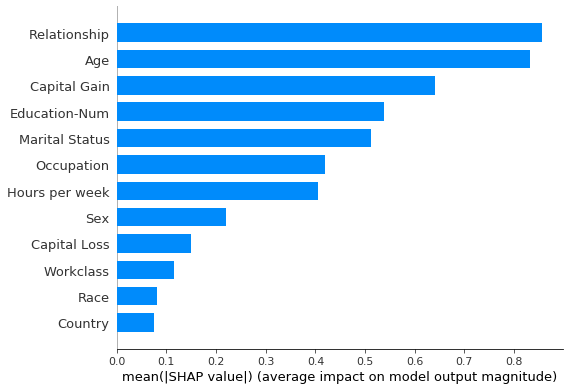

In [21]:
#summary plot
shap.initjs()
shap.summary_plot(shap_values, 
                  X_test, plot_type="bar")

#### Summary Plot

Besides a typical feature importance bar chart, SHAP also enables us to use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset.

Features are sorted by the sum of the SHAP value magnitudes across all samples.

Note that when the scatter points don’t fit on a line they pile up to show density, and the color of each point represents the feature value of that individual.

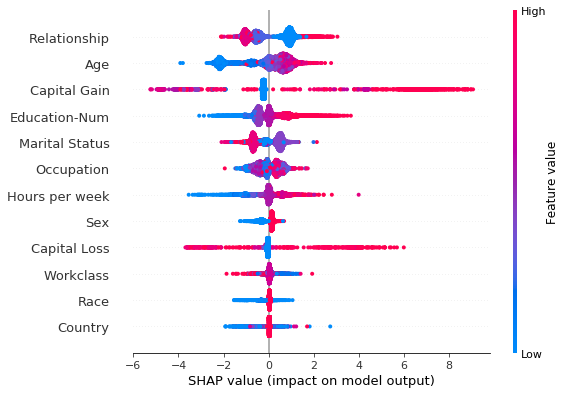

In [24]:
shap.initjs()
#shap.summary_plot(shap_values[:10], X_test[:10])
shap.summary_plot(shap_values, X_test)

#### Dependence Plot

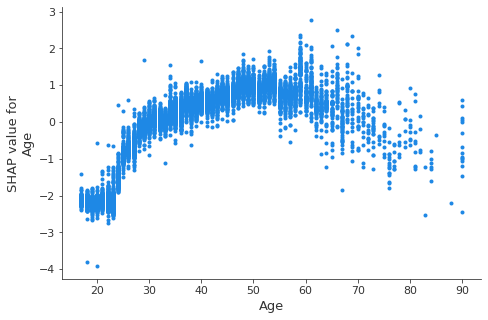

In [25]:
shap.dependence_plot(ind='Age',interaction_index=None,shap_values=shap_values, features=X_test)

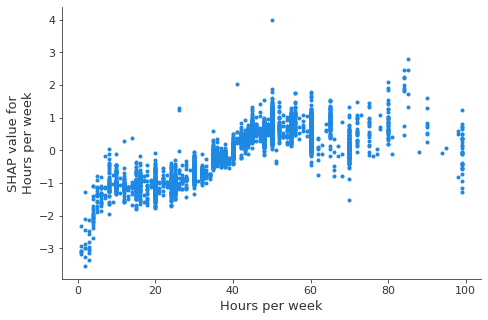

In [26]:
shap.dependence_plot(ind='Hours per week',interaction_index=None,shap_values=shap_values, features=X_test)

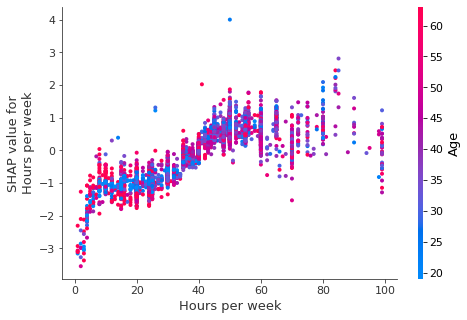

In [28]:
#shap.dependence_plot(ind='Age',interaction_index='Hours per week',shap_values=shap_values, features=X_test)
shap.dependence_plot(ind='Hours per week',interaction_index='Age',shap_values=shap_values, features=X_test)

#### Force Plot

In [33]:
X_test_disp.iloc[2,:]

Age                                29
Workclass                     Private
Education-Num                      13
Marital Status     Married-civ-spouse
Occupation            Exec-managerial
Relationship                  Husband
Race                            Black
Sex                              Male
Capital Gain                        0
Capital Loss                        0
Hours per week                     55
Country                 United-States
Name: 28868, dtype: object

In [37]:
#gbt.predict(X_test.iloc[2,:])

ValueError: Expected 2D array, got 1D array instead:
array=[29.  4. 13.  2.  4.  0.  2.  1.  0.  0. 55. 39.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [40]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[2,:], X_test_disp.iloc[2,:],link='logit')

In [41]:
X_test_disp.iloc[11,:]

Age                               37
Workclass                    Private
Education-Num                      9
Marital Status              Divorced
Occupation         Handlers-cleaners
Relationship           Not-in-family
Race                           White
Sex                             Male
Capital Gain                       0
Capital Loss                       0
Hours per week                    40
Country                United-States
Name: 31900, dtype: object

In [42]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[11,:], X_test_disp.iloc[11,:],link='logit')